In [11]:
import scanpy as sc
#import pertpy as pt
import omicverse as ov
ov.plot_set()

%load_ext autoreload
%autoreload 2

🔬 Starting plot initialization...
🧬 Detecting CUDA devices…
✅ [GPU 0] Tesla V100-SXM2-16GB
    • Total memory: 15.8 GB
    • Compute capability: 7.0
✅ plot_set complete.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import scvi

In [3]:
import os
adata_path = os.path.join('data', "lung_atlas.h5ad")

adata = sc.read(
    adata_path,
    backup_url="https://figshare.com/ndownloader/files/24539942",
)
adata

try downloading from url
https://figshare.com/ndownloader/files/24539942
... this may take a while but only happens once


  0%|          | 0.00/972M [00:00<?, ?B/s]

AnnData object with n_obs × n_vars = 32472 × 15148
    obs: 'dataset', 'location', 'nGene', 'nUMI', 'patientGroup', 'percent.mito', 'protocol', 'sanger_type', 'size_factors', 'sampling_method', 'batch', 'cell_type', 'donor'
    layers: 'counts'

In [ ]:
adata.raw = adata  # keep full dimension safe
sc.pp.highly_variable_genes(
    adata,
    flavor="seurat_v3",
    n_top_genes=2000,
    layer="counts",
    batch_key="batch",
    subset=True,
)
scvi.model.SCVI.setup_anndata(adata, layer="counts", batch_key="batch")


In [6]:
model = scvi.model.SCVI(adata, n_layers=2, n_latent=30, gene_likelihood="nb")
model.train()

SCVI_LATENT_KEY = "X_scVI"
adata.obsm[SCVI_LATENT_KEY] = model.get_latent_representation()

sc.pp.neighbors(adata, use_rep=SCVI_LATENT_KEY)
sc.tl.umap(adata, min_dist=0.3)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Training:   0%|          | 0/246 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=246` reached.


computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:38)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:31)


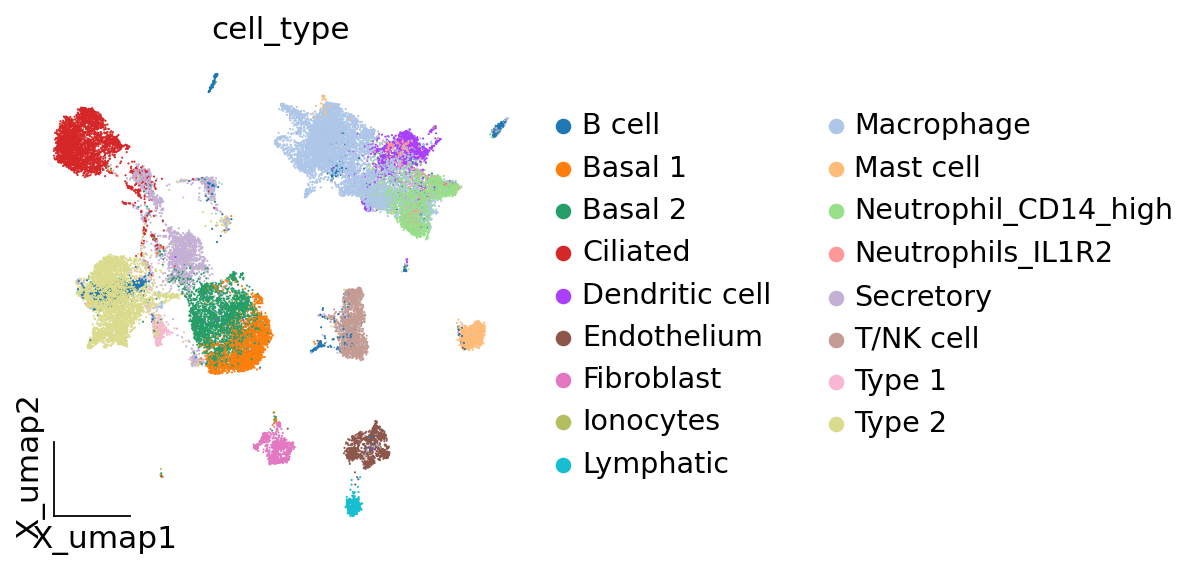

In [8]:
ov.pl.embedding(
    adata,
    basis='X_umap',
    color=['cell_type'],
    wspace=0.55,
    ncols=1
)

In [13]:
adata.write('data/lung_umap.h5ad')

In [7]:
ov.single.download_cl(output_dir="new_ontology", filename="cl.json")


[1/3] Trying Official OBO Library...
    URL: http://purl.obolibrary.org/obo/cl/cl.json
    Description: Direct download from official Cell Ontology
    → Downloading...


    → Downloaded: 32.32 MB
    ✓ File validation successful
    ✓ Successfully downloaded from Official OBO Library
    File saved to: new_ontology/cl.json
    File size: 32.32 MB


(True, 'new_ontology/cl.json')

In [13]:
adata=sc.read('data/lung_umap.h5ad')
adata

AnnData object with n_obs × n_vars = 32472 × 2000
    obs: 'dataset', 'location', 'nGene', 'nUMI', 'patientGroup', 'percent.mito', 'protocol', 'sanger_type', 'size_factors', 'sampling_method', 'batch', 'cell_type', 'donor', '_scvi_batch', '_scvi_labels'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'cell_type_colors', 'hvg', 'neighbors', 'umap'
    obsm: 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [4]:
# 
mapper = ov.single.CellOntologyMapper(
    cl_obo_file="new_ontology/cl.json",
    model_name="sentence-transformers/all-MiniLM-L6-v2",
    local_model_dir="./my_models"
)

🔨 Creating ontology resources from OBO file...
📖 Parsing ontology file...
🧠 Creating NLP embeddings...
🔄 Loading model sentence-transformers/all-MiniLM-L6-v2...
🌐 Checking network connectivity...
✓ Network connection available
🇨🇳 Using HF-Mirror (hf-mirror.com) for faster downloads in China
📁 Models will be saved to: ./my_models
🪞 Downloading model from HF-Mirror: sentence-transformers/all-MiniLM-L6-v2


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

✓ Model loaded successfully from HF-Mirror!
🔄 Encoding 16841 ontology labels...


Batches:   0%|          | 0/527 [00:00<?, ?it/s]

💾 Embeddings saved to: new_ontology/ontology_embeddings.pkl
📋 Ontology mappings included: 16841 cell types
✓ Ontology resources creation completed!


In [33]:
mapper = ov.single.CellOntologyMapper(
    cl_obo_file="new_ontology/cl.json",
    embeddings_path='new_ontology/ontology_embeddings.pkl',
    local_model_dir="./my_models"
)

📥 Loading existing ontology embeddings...
📥 Loaded embeddings for 16841 ontology labels
📋 Ontology mappings loaded: 16841 cell types


In [34]:

mapper.setup_llm_expansion(
    api_type="openai", model='gpt-4o-2024-11-20',
    tissue_context="Lung",    # 组织上下文
    species="Homo sapiens",                   # 物种信息
    study_context="Atlas-level integration of lung data",
    api_key="sk-*"
)
mapper.load_cell_taxonomy_resource("new_ontology/Cell_Taxonomy_resource.txt", 
                                   species_filter=["Homo sapiens", "Mus musculus"])


✓ Loaded 4 cached abbreviation expansions
✓ LLM expansion functionality setup complete (Type: openai, Model: gpt-4o-2024-11-20)
🧬 Tissue context: Lung
🔬 Study context: Atlas-level integration of lung data
🐭 Species: Homo sapiens
📊 Loading Cell Taxonomy resource from: new_ontology/Cell_Taxonomy_resource.txt
✓ Loaded 226222 taxonomy entries
🐭 Filtered by species ['Homo sapiens', 'Mus musculus']: 224736/226222 entries
🔄 Loading model sentence-transformers/all-MiniLM-L6-v2...
🌐 Checking network connectivity...
✓ Network connection available
🇨🇳 Using HF-Mirror (hf-mirror.com) for faster downloads in China
📁 Models will be saved to: ./my_models
🪞 Downloading model from HF-Mirror: sentence-transformers/all-MiniLM-L6-v2
✓ Model loaded successfully from HF-Mirror!
🧠 Creating embeddings for 2540 taxonomy cell types...


Batches:   0%|          | 0/80 [00:00<?, ?it/s]

✓ Created taxonomy embeddings for 2540 cell types
📈 Species distribution:
  🐭 Mus musculus: 141727 entries
  🐭 Homo sapiens: 83009 entries
🧬 Unique cell types: 2540
🎯 Unique markers: 25818


True

In [29]:
mapping_results = mapper.map_adata_with_expansion(
    adata=adata,
    cell_name_col='cell_type',
    threshold=0.5,
    expand_abbreviations=True  # 启用缩写扩展
)

📊 Using 17 unique cell names from column 'cell_type'
📝 Step 1: Expanding abbreviations
🔍 Analyzing cell names...
🧬 Using tissue context: Lung
🔬 Using study context: Atlas-level integration of lung data
🐭 Species: Homo sapiens
✓ No abbreviations found to expand

🎯 Step 2: Performing ontology mapping with LLM-enhanced selection
🎯 Mapping 17 cell names...
🤖 LLM-enhanced selection enabled (from top 10 candidates)


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

  🤖 [1/17] LLM selecting for: Type 2
    ✓ LLM selected: type II vestibular sensory cell (rank 3, sim: 0.437)
    💡 Reasoning: While the term 'Type 2' is ambiguous, none of the candidates directly align with a well-defined lung...
  🤖 [2/17] LLM selecting for: Secretory
    ✓ LLM selected: secretory cell (rank 1, sim: 0.662)
    💡 Reasoning: The term 'secretory cell' is the most biologically accurate and contextually appropriate choice for ...
  🤖 [3/17] LLM selecting for: Type 1
    ✓ LLM selected: DMBT1 (rank 7, sim: 0.434)
    💡 Reasoning: DMBT1 (Deleted in Malignant Brain Tumors 1) is associated with mucosal immunity and epithelial cell ...
  🤖 [4/17] LLM selecting for: Macrophage
    ✓ LLM selected: tissue-resident macrophage (rank 2, sim: 0.735)
    💡 Reasoning: Tissue-resident macrophages are a well-defined population of macrophages that reside in specific tis...
  🤖 [5/17] LLM selecting for: B cell
    ✓ LLM selected: B cell (rank 2, sim: 0.717)
    💡 Reasoning: The term 'B cel

In [35]:
enhanced_results = mapper.map_adata_with_taxonomy(
    adata, 
    cell_name_col="cell_type",
    new_col_name="enhanced_cell_ontology",
    expand_abbreviations=True,
    use_taxonomy=True,
    species="Homo sapiens",
    tissue_context="Lung",
    threshold=0.4,
)

📊 Using 17 unique cell names from column 'cell_type'
📝 Step 1: Expanding abbreviations
🔍 Analyzing cell names...
🧬 Using tissue context: Lung
🔬 Using study context: Atlas-level integration of lung data
🐭 Species: Homo sapiens
✓ No abbreviations found to expand

🎯 Step 2: Performing ontology mapping with LLM-enhanced selection
🎯 Mapping 17 cell names...
🤖 LLM-enhanced selection enabled (from top 10 candidates)


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

  🤖 [1/17] LLM selecting for: Type 2
    ✓ LLM selected: paraganglia type 2 cell (rank 8, sim: 0.417)
    💡 Reasoning: While none of the candidates perfectly match the context of lung tissue in humans, 'paraganglia type...
  🤖 [2/17] LLM selecting for: Secretory
    ✓ LLM selected: secretory cell (rank 1, sim: 0.662)
    💡 Reasoning: The term 'secretory cell' is the most biologically accurate and contextually appropriate choice for ...
  🤖 [3/17] LLM selecting for: Type 1
    ✓ LLM selected: DMBT1 (rank 7, sim: 0.434)
    💡 Reasoning: DMBT1 (Deleted in Malignant Brain Tumors 1) is associated with mucosal immunity and epithelial cell ...
  🤖 [4/17] LLM selecting for: Macrophage
    ✓ LLM selected: tissue-resident macrophage (rank 2, sim: 0.735)
    💡 Reasoning: Tissue-resident macrophages are the most biologically appropriate choice for the lung context as the...
  🤖 [5/17] LLM selecting for: B cell
    ✓ LLM selected: B cell (rank 2, sim: 0.717)
    💡 Reasoning: The term 'B cell' is th

In [44]:
adata.obs.to_csv('data/lung_anno.csv')

In [14]:
adata.obs=ov.read('data/lung_anno.csv',index_col=0)

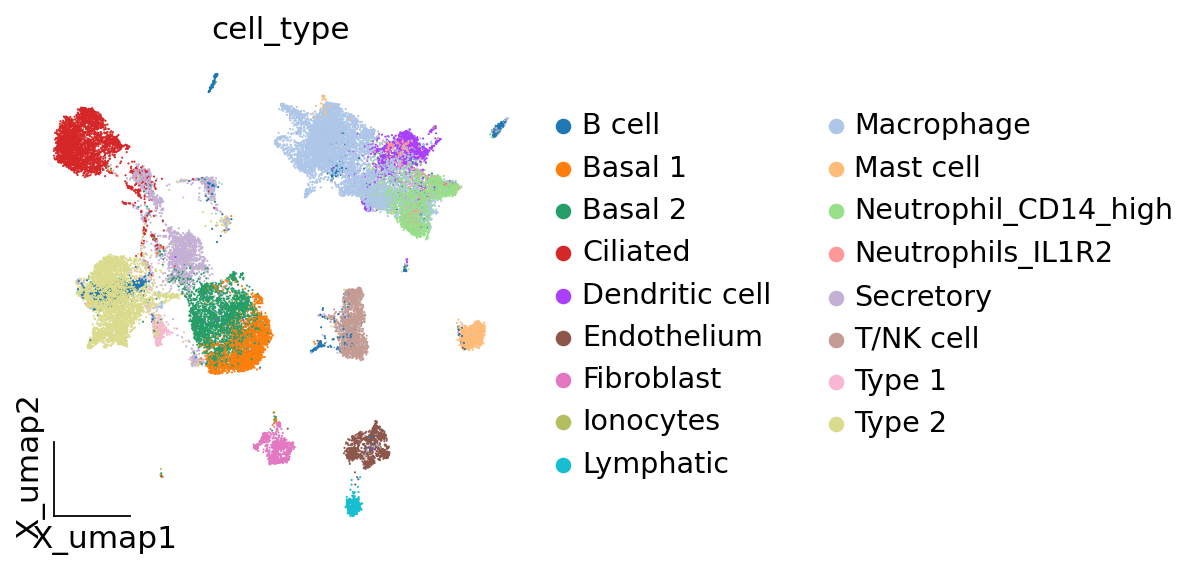

In [15]:
ov.pl.embedding(
    adata,
    basis='X_umap',
    color=['cell_type'],
    wspace=0.55,
    ncols=1
)

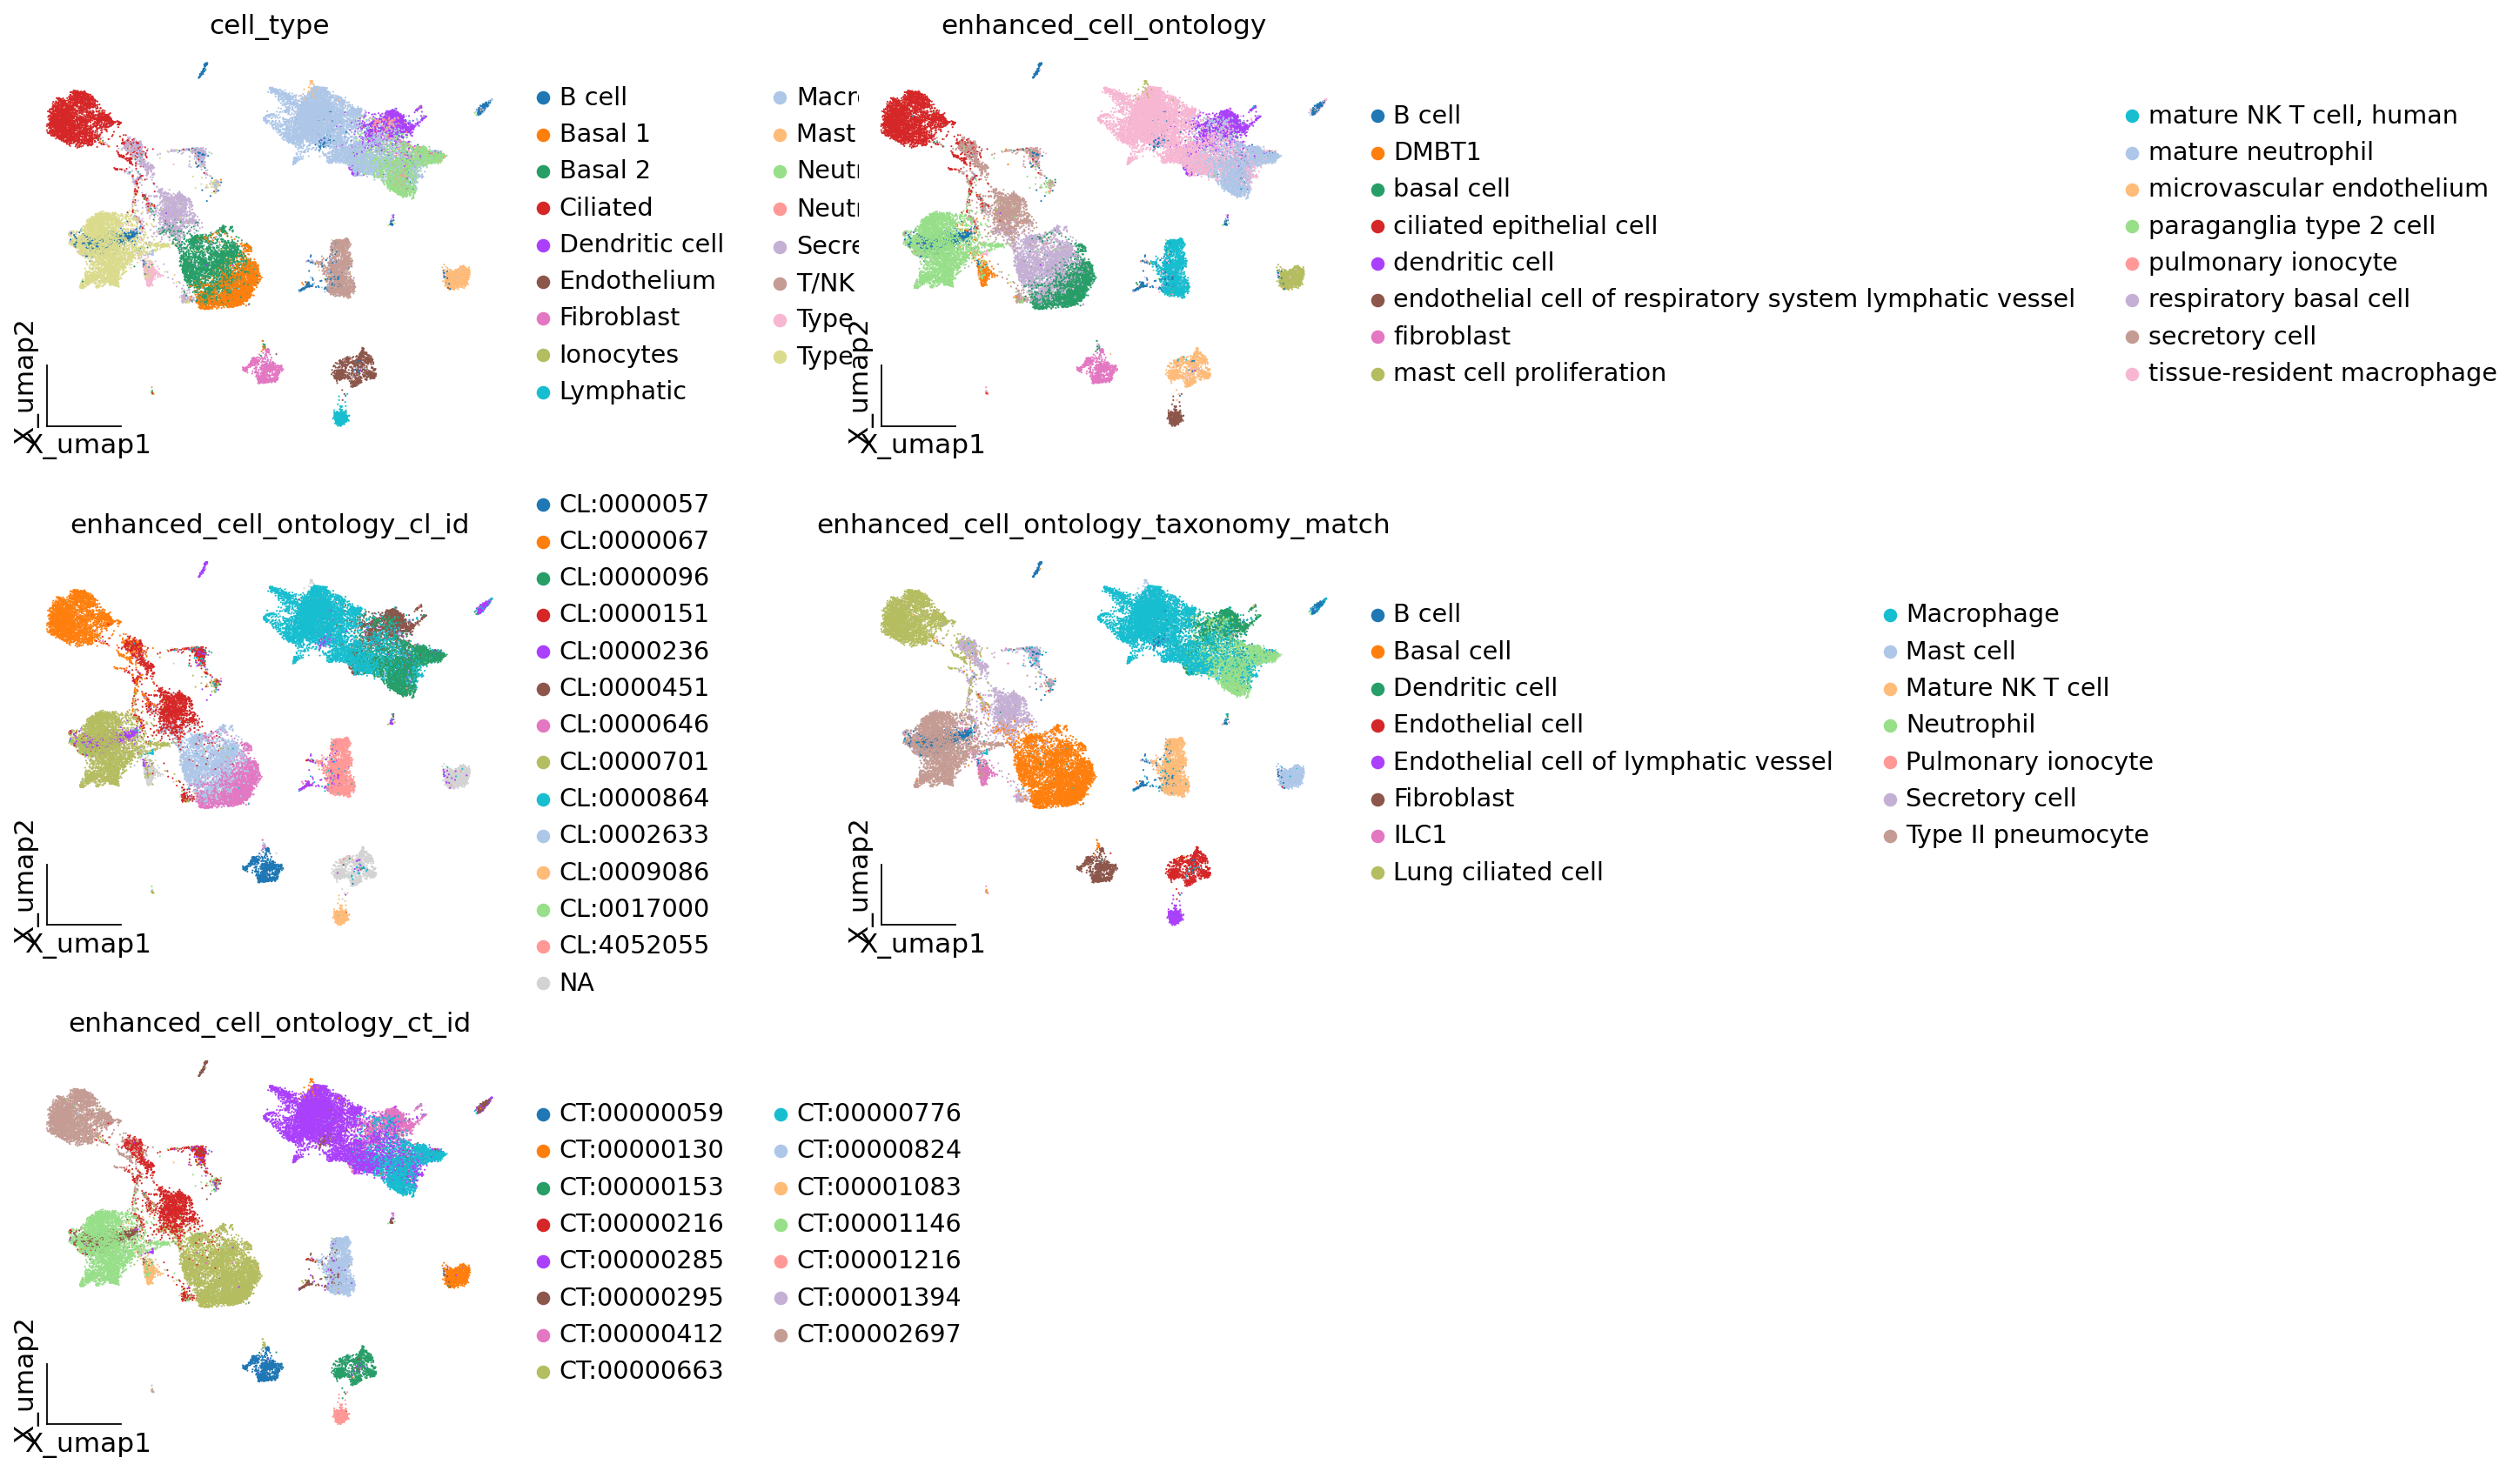

In [36]:
ov.pl.embedding(
    adata,
    basis='X_umap',
    color=['cell_type','enhanced_cell_ontology','enhanced_cell_ontology_cl_id',
          'enhanced_cell_ontology_taxonomy_match','enhanced_cell_ontology_ct_id'],
    wspace=0.55,
    ncols=2
)

In [19]:
# 获取详细的taxonomy信息
info_list = mapper.get_cell_info_taxonomy(
    "Neutrophil  CD14 ", 
    species="Homo sapiens"
)

✗ Cell type not found in taxonomy: Neutrophil  CD14 
💡 Searching for similar cell types...

🧬 Taxonomy cell types most similar to 'Neutrophil  CD14 ':
🐭 Filtered by species: Homo sapiens
 1. Neutrophil                               (Similarity: 0.738)
     🐭 Species: Homo sapiens
     🎯 Marker: TLR6
     🆔 CT ID: CT:00000776

 2. CD141-positive myeloid dendritic cell    (Similarity: 0.722)
     🐭 Species: Homo sapiens
     🎯 Marker: CLEC9A
     🆔 CT ID: CT:00001455

 3. CD14-positive dermal dendritic cell      (Similarity: 0.705)
     🐭 Species: Homo sapiens
     🎯 Marker: CD163
     🆔 CT ID: CT:00001584

 4. CD14-positive monocyte                   (Similarity: 0.704)
     🐭 Species: Homo sapiens
     🎯 Marker: CLU
     🆔 CT ID: CT:00001057

 5. CD14-positive, CD16-low monocyte         (Similarity: 0.684)
     🐭 Species: Homo sapiens
     🎯 Marker: CSF3R
     🆔 CT ID: CT:00001058

💡 Did you mean one of these:
  - Neutrophil (sim: 0.738)
  - CD141-positive myeloid dendritic cell (sim: 

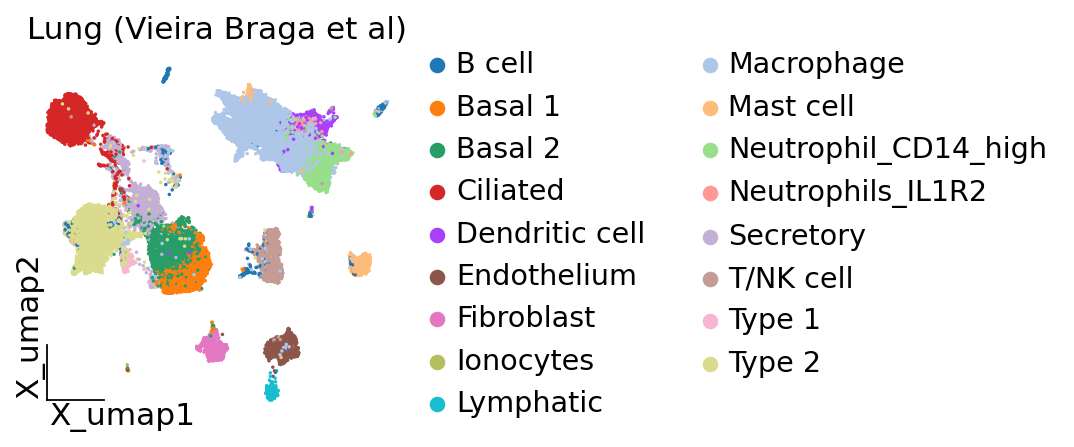

In [5]:
fig, ax = ov.plt.subplots(figsize=(3,3))
ov.pl.embedding(
    adata,
    basis='X_umap',
    color='cell_type',
    title='Lung (Vieira Braga et al)',
    show=False,
    #palette=rgba_list_to_hex(cmaps.greenorange_12.colors)+ov.pl.sc_color[11:],
    ax=ax,
    size=10,
)

ax.xaxis.set_label_coords(0.05, 0.04)
ax.yaxis.set_label_coords(0.04, 0.05)

#fig.savefig(f'figures/umap-lung-author-33.svg',dpi=300,bbox_inches='tight')
fig.savefig(f'figures/umap-lung-author-33.png',dpi=300,bbox_inches='tight')

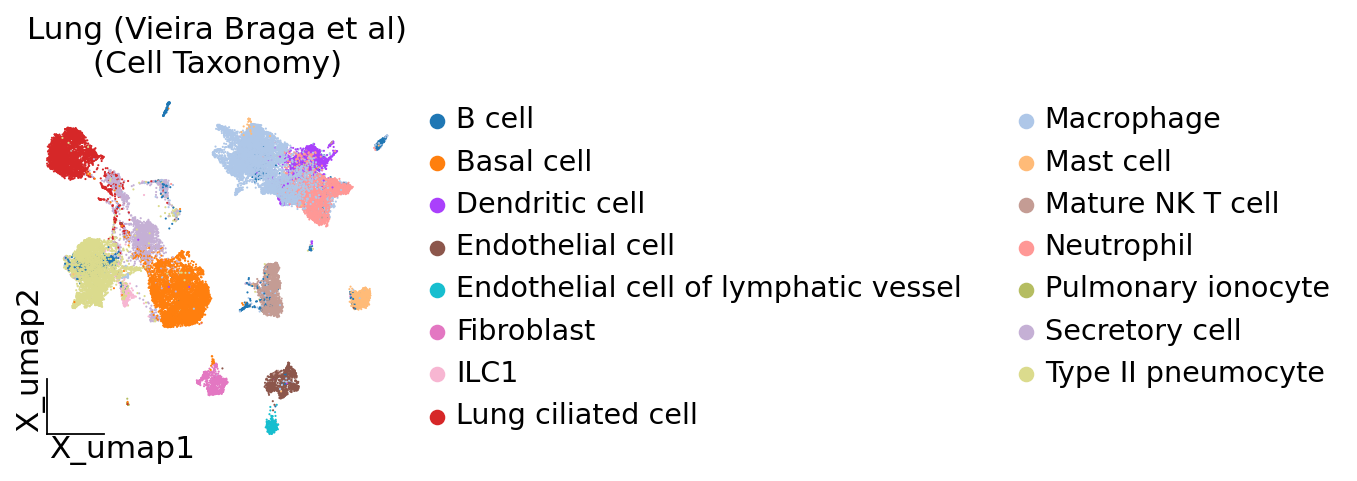

In [6]:
fig, ax = ov.plt.subplots(figsize=(3,3))

goal='enhanced_cell_ontology_taxonomy_match'

type_dict=dict(zip(
    adata.obs['cell_type'],
    adata.obs[goal],
))
color_dict=dict(zip(
    adata.obs['cell_type'].cat.categories,
    adata.uns['cell_type_colors'],
))
new_type_color_dict=dict(zip(
    [type_dict[k] for k in type_dict.keys()],
    [color_dict[i] for i in type_dict.keys()]
))
#new_type_color_dict


ov.pl.embedding(
    adata,
    basis='X_umap',
    color=goal,
    title='Lung (Vieira Braga et al)\n(Cell Taxonomy)',
    show=False,
    palette=new_type_color_dict,
    ax=ax,
    #size=10,
)

ax.xaxis.set_label_coords(0.05, 0.04)
ax.yaxis.set_label_coords(0.04, 0.05)

#fig.savefig(f'figures/umap-lung-author-33.svg',dpi=300,bbox_inches='tight')
fig.savefig(f'figures/umap-lung-taxonomy-33.png',dpi=300,bbox_inches='tight')

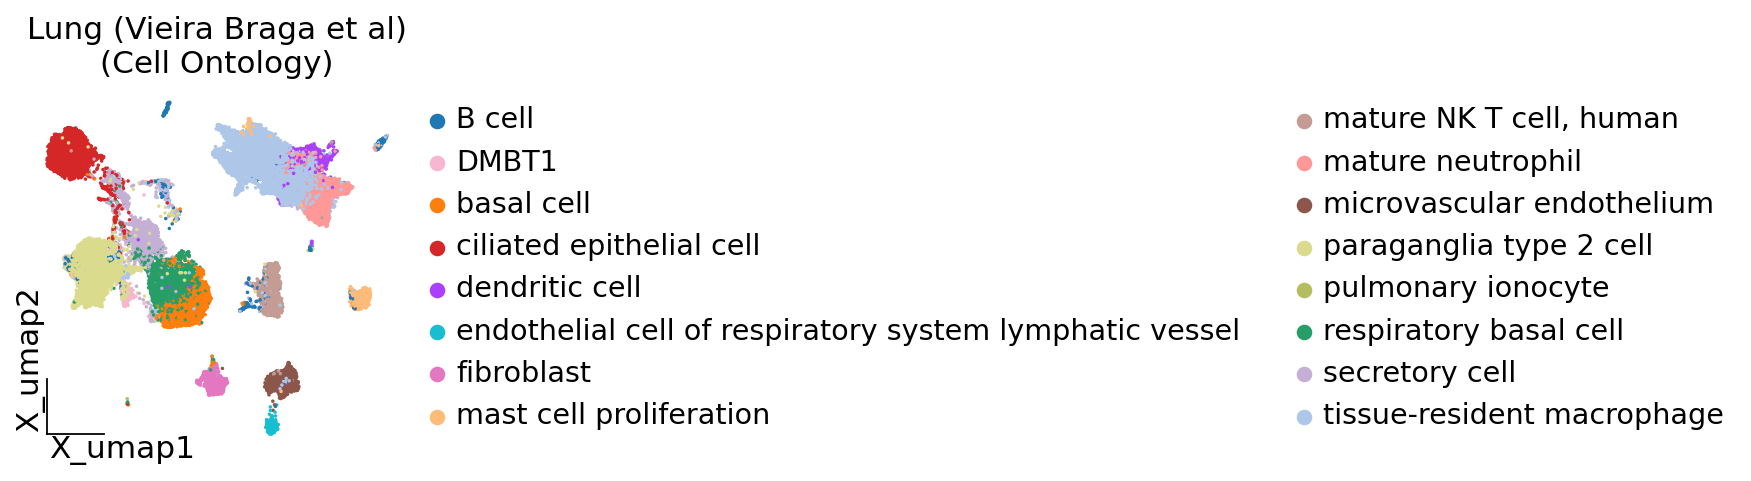

In [10]:
fig, ax = ov.plt.subplots(figsize=(3,3))

goal='enhanced_cell_ontology'

type_dict=dict(zip(
    adata.obs['cell_type'],
    adata.obs[goal],
))
color_dict=dict(zip(
    adata.obs['cell_type'].cat.categories,
    adata.uns['cell_type_colors'],
))
new_type_color_dict=dict(zip(
    [type_dict[k] for k in type_dict.keys()],
    [color_dict[i] for i in type_dict.keys()]
))

ov.pl.embedding(
    adata,
    basis='X_umap',
    color=goal,
    title='Lung (Vieira Braga et al)\n(Cell Ontology)',
    show=False,
    palette=new_type_color_dict,
    ax=ax,
    size=10,
)

ax.xaxis.set_label_coords(0.05, 0.04)
ax.yaxis.set_label_coords(0.04, 0.05)

#fig.savefig(f'figures/umap-lung-author-33.svg',dpi=300,bbox_inches='tight')
fig.savefig(f'figures/umap-lung-ontology-33.png',dpi=300,bbox_inches='tight')

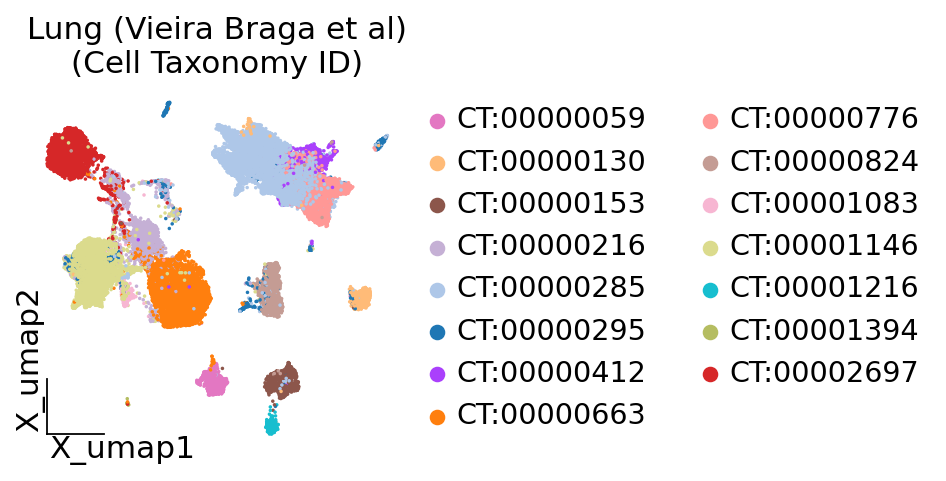

In [8]:
fig, ax = ov.plt.subplots(figsize=(3,3))

goal='enhanced_cell_ontology_ct_id'

type_dict=dict(zip(
    adata.obs['cell_type'],
    adata.obs[goal],
))
color_dict=dict(zip(
    adata.obs['cell_type'].cat.categories,
    adata.uns['cell_type_colors'],
))
new_type_color_dict=dict(zip(
    [type_dict[k] for k in type_dict.keys()],
    [color_dict[i] for i in type_dict.keys()]
))

ov.pl.embedding(
    adata,
    basis='X_umap',
    color=goal,
    title='Lung (Vieira Braga et al)\n(Cell Taxonomy ID)',
    show=False,
    palette=new_type_color_dict,
    ax=ax,
    size=10,
)

ax.xaxis.set_label_coords(0.05, 0.04)
ax.yaxis.set_label_coords(0.04, 0.05)

#fig.savefig(f'figures/umap-lung-author-33.svg',dpi=300,bbox_inches='tight')
fig.savefig(f'figures/umap-lung-taxonomy-id-33.png',dpi=300,bbox_inches='tight')

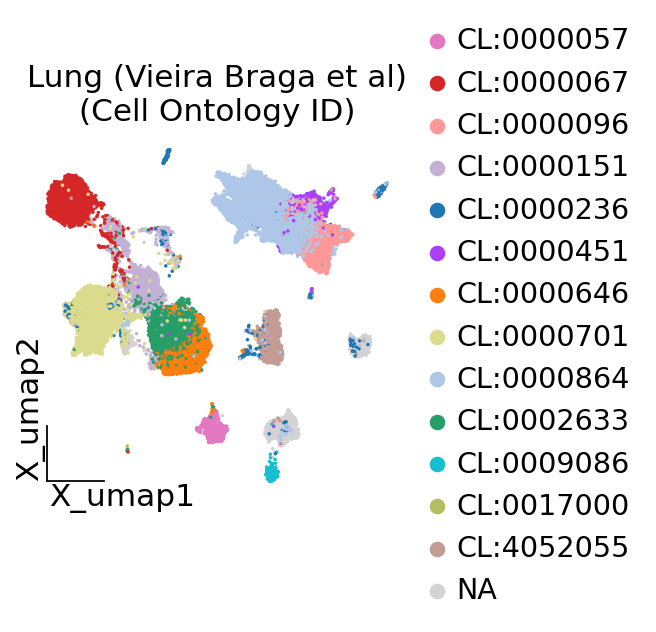

In [9]:
fig, ax = ov.plt.subplots(figsize=(3,3))
goal='enhanced_cell_ontology_cl_id'

type_dict=dict(zip(
    adata.obs['cell_type'],
    adata.obs[goal],
))
color_dict=dict(zip(
    adata.obs['cell_type'].cat.categories,
    adata.uns['cell_type_colors'],
))
new_type_color_dict=dict(zip(
    [type_dict[k] for k in type_dict.keys()],
    [color_dict[i] for i in type_dict.keys()]
))

ov.pl.embedding(
    adata,
    basis='X_umap',
    color=goal,
    title='Lung (Vieira Braga et al)\n(Cell Ontology ID)',
    show=False,
    palette=new_type_color_dict,
    ax=ax,
    size=10,
)

ax.xaxis.set_label_coords(0.05, 0.04)
ax.yaxis.set_label_coords(0.04, 0.05)

#fig.savefig(f'figures/umap-lung-author-33.svg',dpi=300,bbox_inches='tight')
fig.savefig(f'figures/umap-lung-ontology-id-33.png',dpi=300,bbox_inches='tight')

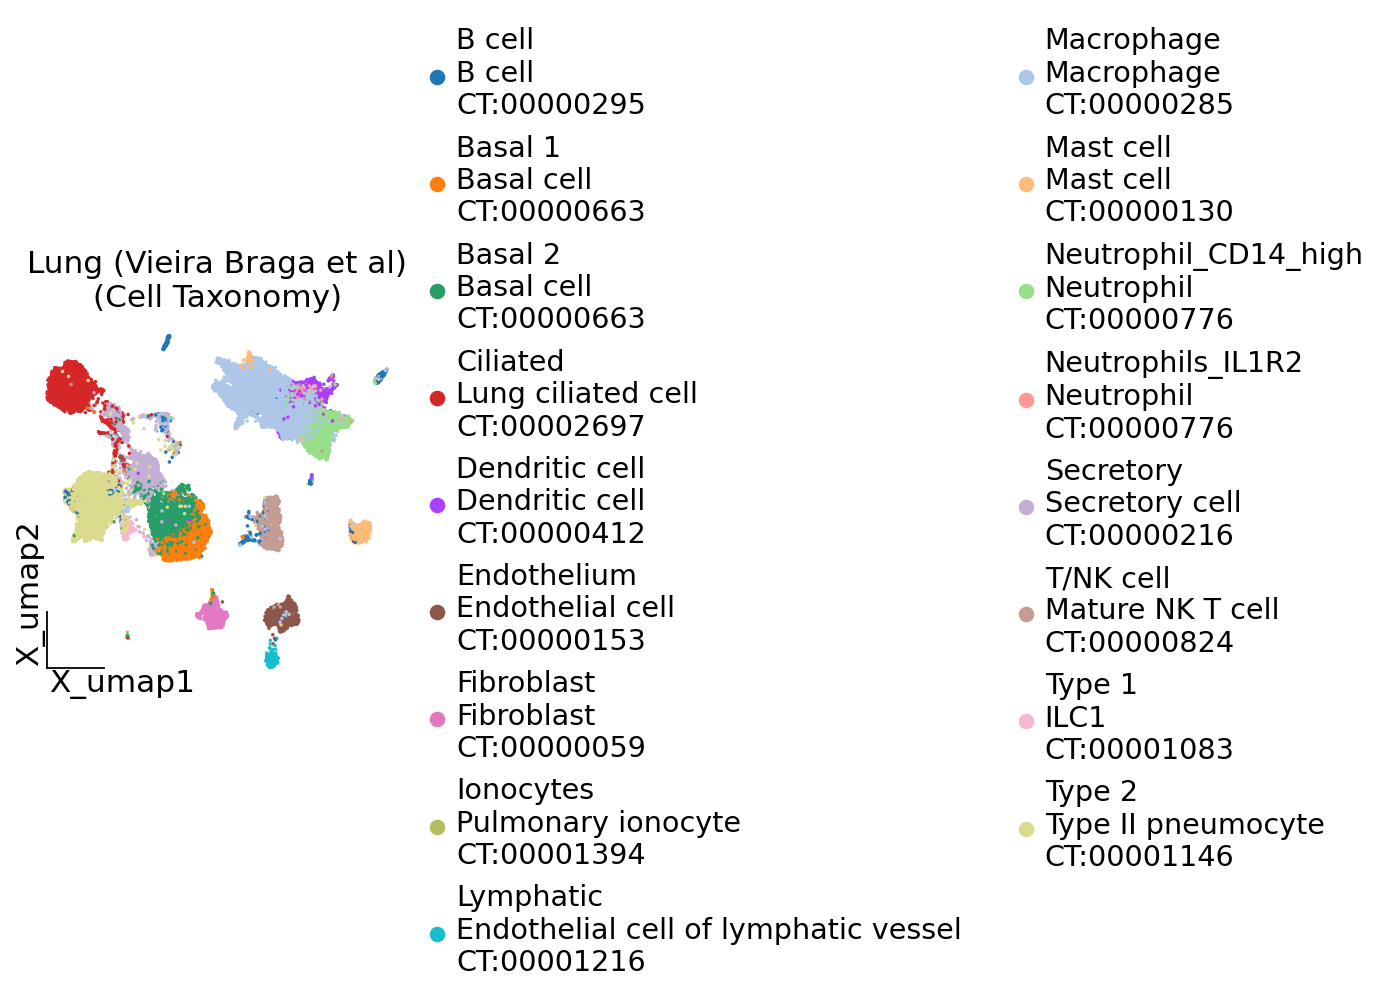

In [20]:
goal='enhanced_cell_ontology_taxonomy_match'

adata.obs['vis_ct']=[i+'\n'+j+'\n'+k for i,j,k in zip(
    adata.obs['cell_type'].tolist(),
    adata.obs[goal].tolist(),
    adata.obs['enhanced_cell_ontology_ct_id'].tolist(),
)
]

fig, ax = ov.plt.subplots(figsize=(3,3))

type_dict=dict(zip(
    adata.obs['cell_type'],
    adata.obs['vis_ct'],
))
color_dict=dict(zip(
    adata.obs['cell_type'].cat.categories,
    adata.uns['cell_type_colors'],
))
new_type_color_dict=dict(zip(
    [type_dict[k] for k in type_dict.keys()],
    [color_dict[i] for i in type_dict.keys()]
))

ov.pl.embedding(
    adata,
    basis='X_umap',
    color='vis_ct',
    title='Lung (Vieira Braga et al)\n(Cell Taxonomy)',
    show=False,
    palette=new_type_color_dict,
    ax=ax,
    size=10,
)

ax.xaxis.set_label_coords(0.05, 0.04)
ax.yaxis.set_label_coords(0.04, 0.05)

fig.savefig(f'figures/umap-lung-Taxonomy-match-id-33.png',dpi=300,bbox_inches='tight')

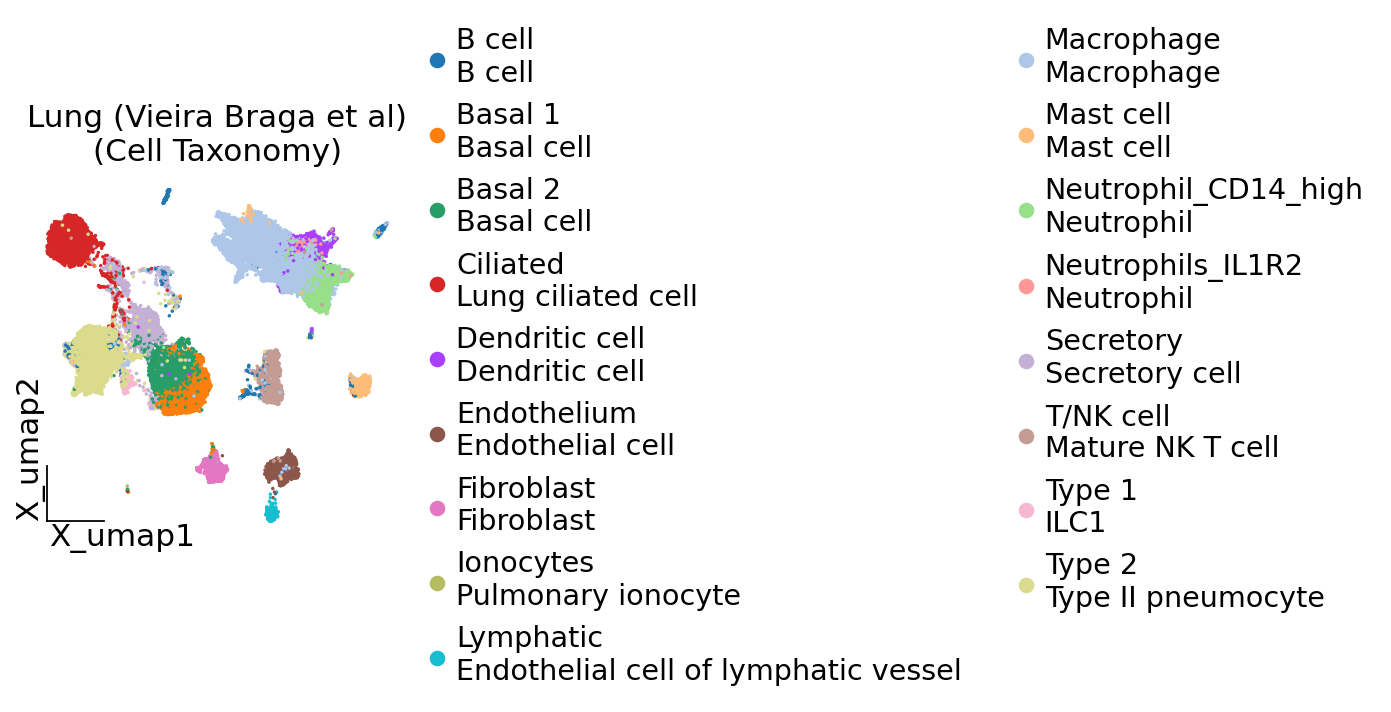

In [21]:
goal='enhanced_cell_ontology_taxonomy_match'

adata.obs['vis_ct']=[i+'\n'+j for i,j in zip(
    adata.obs['cell_type'].tolist(),
    adata.obs[goal].tolist(),
)
]

fig, ax = ov.plt.subplots(figsize=(3,3))

type_dict=dict(zip(
    adata.obs['cell_type'],
    adata.obs['vis_ct'],
))
color_dict=dict(zip(
    adata.obs['cell_type'].cat.categories,
    adata.uns['cell_type_colors'],
))
new_type_color_dict=dict(zip(
    [type_dict[k] for k in type_dict.keys()],
    [color_dict[i] for i in type_dict.keys()]
))

ov.pl.embedding(
    adata,
    basis='X_umap',
    color='vis_ct',
    title='Lung (Vieira Braga et al)\n(Cell Taxonomy)',
    show=False,
    palette=new_type_color_dict,
    ax=ax,
    size=10,
)

ax.xaxis.set_label_coords(0.05, 0.04)
ax.yaxis.set_label_coords(0.04, 0.05)

fig.savefig(f'figures/umap-lung-Taxonomy-match-33.png',dpi=300,bbox_inches='tight')